In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.losses,keras.metrics
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv


In [2]:
df_train=pd.read_csv('/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv')

In [3]:
df_train.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Schooling', 'Breastfeeding',
       'Varicella', 'Initial_Symptom', 'Mono_or_Polysymptomatic',
       'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP', 'VEP', 'BAEP',
       'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI',
       'Spinal_Cord_MRI', 'Initial_EDSS', 'Final_EDSS', 'group'],
      dtype='object')

df_train.head()

In [4]:
df_train.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [5]:
df_train["group"].describe()

count    273.000000
mean       1.542125
std        0.499137
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: group, dtype: float64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [7]:
df_train.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [8]:
df_train[df_train.Schooling.isna()]

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
204,204,2,38,NaN,3,3,2.0,2,1,1,1,0,0,0,0,1,1,NaN,NaN,2


In [9]:
df_train=df_train[df_train['Initial_Symptom'].isna()==False]
df_train=df_train[df_train['Schooling'].isna()==False]

In [10]:
df_train.Initial_EDSS.value_counts()

1.0    87
2.0    31
3.0     7
Name: Initial_EDSS, dtype: int64

In [11]:
df_train.Final_EDSS.value_counts()

1.0    80
2.0    34
3.0    11
Name: Final_EDSS, dtype: int64

In [12]:
df_train['Initial_EDSS'].fillna(method='ffill', inplace=True)
df_train['Final_EDSS'].fillna(method='ffill', inplace=True)

In [13]:
df_train.Initial_EDSS.value_counts()

1.0    233
2.0     31
3.0      7
Name: Initial_EDSS, dtype: int64

In [14]:
df_train.Final_EDSS.value_counts()

1.0    226
2.0     34
3.0     11
Name: Final_EDSS, dtype: int64

In [15]:
df_train.drop(['Unnamed: 0','Initial_EDSS', 'Final_EDSS'], axis =1, inplace = True)
df_train.dropna(inplace= True)
df_train.shape

(271, 17)

In [16]:
df_train.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1


In [17]:
for col in df_train:
  print(col)
  print(df_train[col].value_counts())
  print("--------------------------")

Gender
2    166
1    105
Name: Gender, dtype: int64
--------------------------
Age
28    16
24    15
34    14
40    11
29    11
36    11
38    10
22    10
31    10
35     9
25     8
27     8
21     8
39     8
44     7
32     7
19     7
30     7
37     6
41     6
47     5
17     5
50     5
26     5
16     5
43     4
20     4
33     4
45     4
51     4
23     4
46     4
55     3
48     3
59     3
42     3
60     3
53     2
49     2
52     2
56     1
15     1
61     1
54     1
70     1
65     1
18     1
77     1
Name: Age, dtype: int64
--------------------------
Schooling
20.0    83
15.0    81
12.0    58
9.0     34
22.0     4
6.0      3
25.0     2
14.0     2
0.0      1
23.0     1
24.0     1
8.0      1
Name: Schooling, dtype: int64
--------------------------
Breastfeeding
1    131
3     83
2     57
Name: Breastfeeding, dtype: int64
--------------------------
Varicella
1    124
2    104
3     43
Name: Varicella, dtype: int64
--------------------------
Initial_Symptom
8.0     39
3.0     32
1

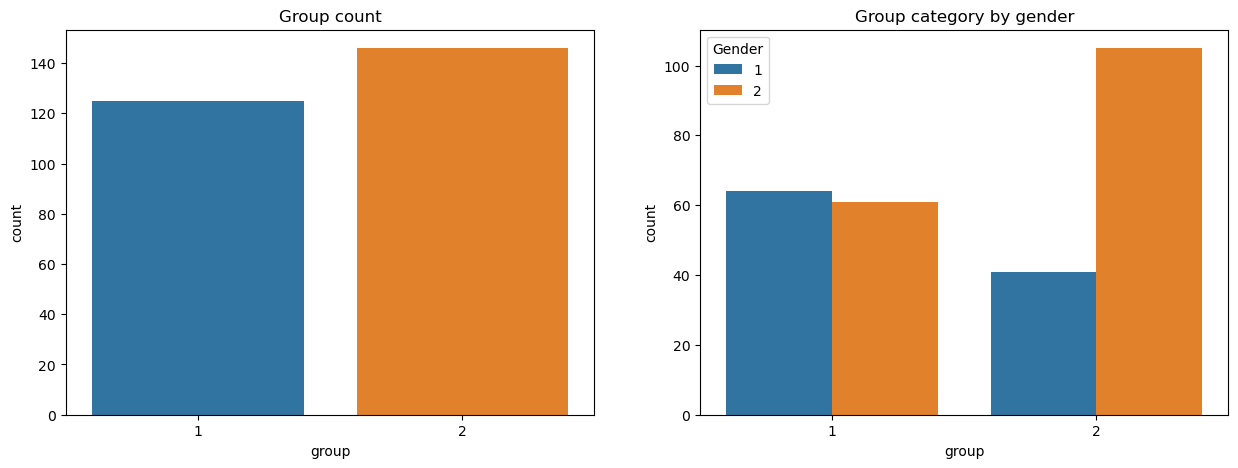

In [18]:
ig,axes = plt.subplots(nrows=1,ncols = 2,figsize=(15,5))
sns.countplot(ax = axes[0],x='group',data = df_train);
sns.countplot(ax = axes[1],x='group',data = df_train,hue = 'Gender');

axes[1].title.set_text('Group category by gender')
axes[0].title.set_text('Group count')


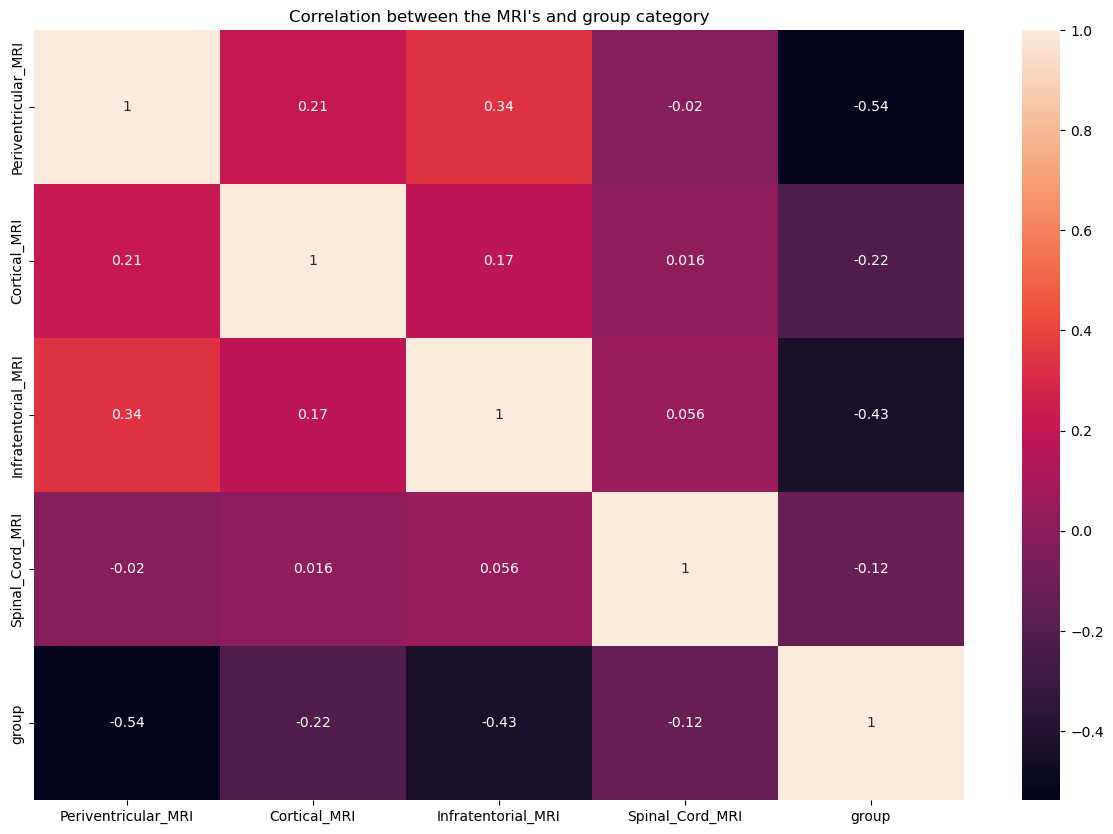

In [19]:
corr =df_train.loc[:,['Periventricular_MRI','Cortical_MRI','Infratentorial_MRI','Spinal_Cord_MRI','group']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr,annot = True)
plt.title('Correlation between the MRI\'s and group category');

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('group',axis=1), df_train.group, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_predict, labels=[1, 2]))

rf_score = model.score(X_test, y_test)

              precision    recall  f1-score   support

           1       0.85      0.81      0.83        27
           2       0.83      0.86      0.84        28

    accuracy                           0.84        55
   macro avg       0.84      0.84      0.84        55
weighted avg       0.84      0.84      0.84        55



In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('group',axis=1), df_train.group, test_size=0.22, random_state=23)

lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

y_pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

lg_score = model.score(X_test, y_test)

Accuracy: 0.8666666666666667


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.svm import SVC

model_svg = SVC(kernel="linear")

model_svg.fit(X_train,y_train)

svc_score = model_svg.score(X_test, y_test)

y_pred = model_svg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

score = { 
    'Model_Name' : ['SVC'],
       'Score'   : [svc_score]
        }

score_df= pd.DataFrame(score)
score_df

Accuracy: 0.9


,Model_Name,Score
0,SVC,0.9


In [24]:
score = { 
    'Model_Name' : ['Logistic Regression','SVC','Random Forest'],
       'Score'   : [lg_score, svc_score,rf_score]
        }

score_df= pd.DataFrame(score)
score_df

,Model_Name,Score
0,Logistic Regression,0.983333
1,SVC,0.900000
2,Random Forest,0.836364


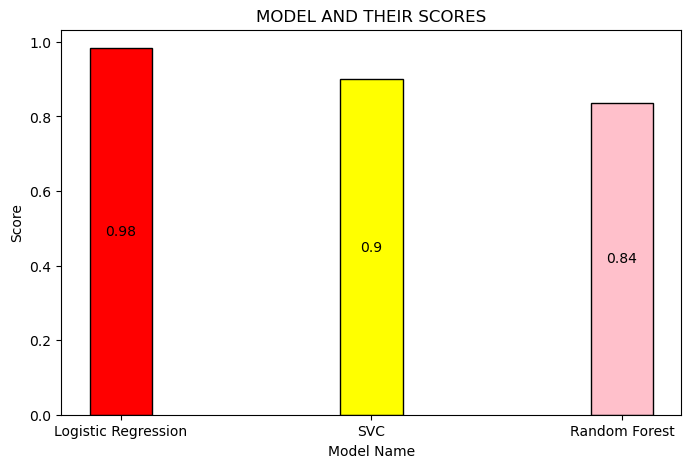

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 5))
barplot = plt.bar(score_df.Model_Name, score_df.Score,color =['red', 'yellow', 'pink', 'cyan'] ,edgecolor = "black", width = 0.25)
plt.bar_label(barplot , labels= round(score_df.Score,2), label_type='center')
plt.xlabel("Model Name")
plt.ylabel("Score")
plt.title("MODEL AND THEIR SCORES")
plt.show()

Text(50.722222222222214, 0.5, 'True Labels')

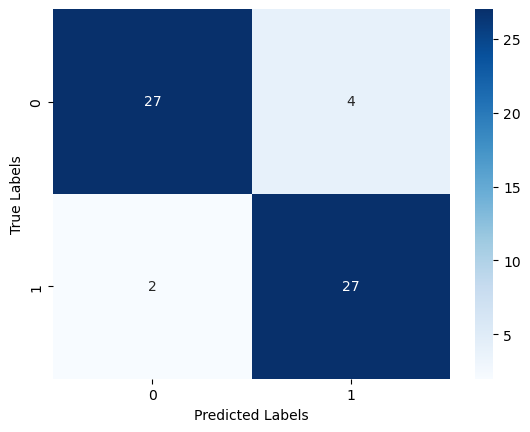

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

Epoch 1/10
7/7 [==============================] - 2s 38ms/step - loss: -0.3422 - accuracy: 0.3412 - val_loss: -2.2164 - val_accuracy: 0.5167
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: -3.9435 - accuracy: 0.4455 - val_loss: -4.9335 - val_accuracy: 0.5167
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: -7.3007 - accuracy: 0.4455 - val_loss: -7.8675 - val_accuracy: 0.5167
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: -10.8521 - accuracy: 0.4455 - val_loss: -11.2825 - val_accuracy: 0.5167
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: -15.1226 - accuracy: 0.4455 - val_loss: -15.2789 - val_accuracy: 0.5167
Epoch 6/10
7/7 [==============================] - 0s 9ms/step - loss: -20.1505 - accuracy: 0.4455 - val_loss: -19.9894 - val_accuracy: 0.5167
Epoch 7/10
7/7 [==============================] - 0s 9ms/step - loss: -26.1486 - accuracy: 0.4455 - val_loss: -25.3991 - val_accuracy: 0.5167
Epoch 8/1

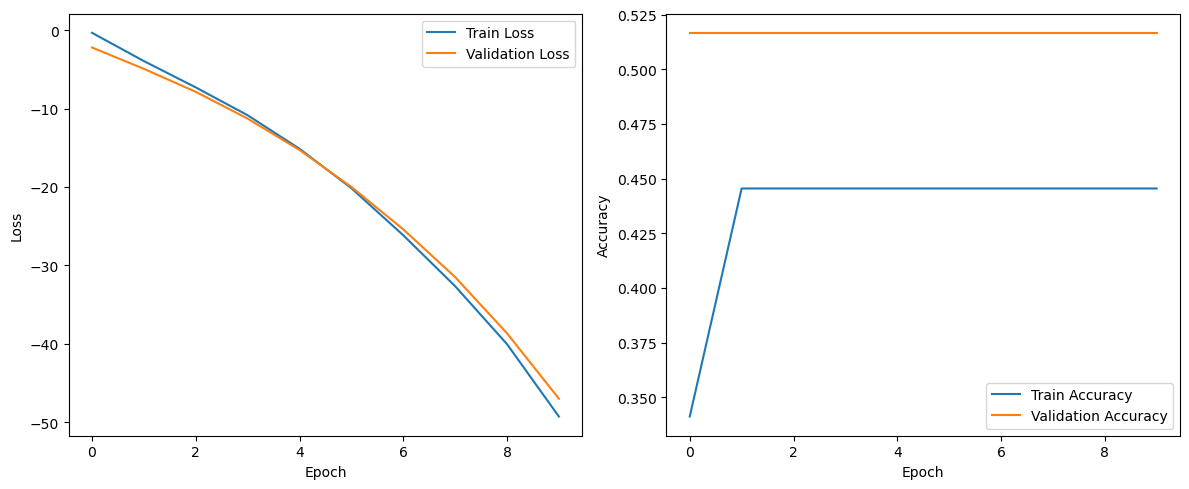

In [30]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Build a neural network model
model_cnn = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and record training history
history = model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.4f}")

# Plot loss and accuracy graphs
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 2.7572 - val_loss: 1.4177
Epoch 2/10
1/1 [==============================] - 0s 83ms/step - loss: 1.9428 - val_loss: 0.8830
Epoch 3/10
1/1 [==============================] - 0s 41ms/step - loss: 1.2461 - val_loss: 0.4861
Epoch 4/10
1/1 [==============================] - 0s 40ms/step - loss: 0.6807 - val_loss: 0.2866
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 0.3041 - val_loss: 0.3531
Epoch 6/10
1/1 [==============================] - 0s 40ms/step - loss: 0.1891 - val_loss: 0.6563
Epoch 7/10
1/1 [==============================] - 0s 56ms/step - loss: 0.3326 - val_loss: 0.9037
Epoch 8/10
1/1 [==============================] - 0s 78ms/step - loss: 0.4979 - val_loss: 0.9328
Epoch 9/10
1/1 [==============================] - 0s 40ms/step - loss: 0.5190 - val_loss: 0.8083
Epoch 10/10
1/1 [==============================] - 1s 991ms/step
Mean Squared Error: 0.38


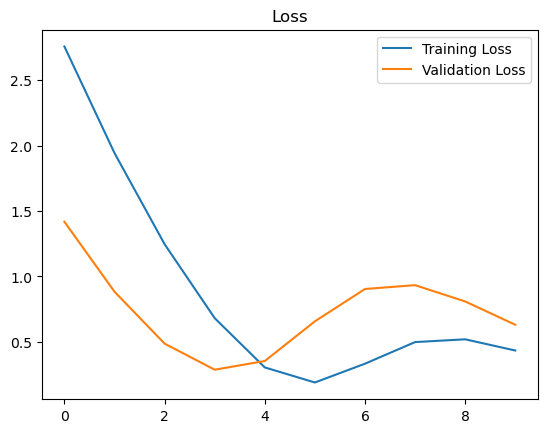

In [28]:
#LSTM model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Choose a smaller subset of data for modeling
subset_size = 20  # Adjust this to your desired subset size
subset_df = df_train.sample(n=subset_size, random_state=42)

# Choose the target variable for forecasting
target_variable = 'group'  # Change this to the desired target variable

# Create sequences for time series data
sequence_length = 10  # Define the number of time steps in each sequence
X_sequences = []
y_labels = []

for i in range(len(subset_df) - sequence_length):
    X_sequences.append(subset_df.drop(columns=target_variable).iloc[i:i+sequence_length])
    y_labels.append(subset_df[target_variable].iloc[i+sequence_length])

X_sequences = np.array(X_sequences)
y_labels = np.array(y_labels)

# Split into training and validation sets
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(X_sequences, y_labels, test_size=0.2, random_state=42)

# Build a more complex LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, X_sequences.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the more complex LSTM model
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=64, validation_data=(X_val_seq, y_val_seq))

# Predict future values using the more complex LSTM model
X_test_sequences = []
for i in range(len(subset_df) - sequence_length):
    X_test_sequences.append(subset_df.drop(columns=target_variable).iloc[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences)
y_pred = model.predict(X_test_sequences)

# Calculate Mean Squared Error
mse = mean_squared_error(y_labels, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [31]:
model_cnn.save('/kaggle/working/mymodel.h5')